In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Set data path (replace with your actual path)
file_path = "E:/Data Science Project/Unified Mentor Project/Intership Project/Project 4_Finanical Analytics/Financial Analytics data.csv"

# Read data into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [3]:
# Drop the 'Unnamed: 4' column as it seems to be empty
df = df.drop(columns=['Unnamed: 4'])

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Data type check
print("\nData Types:")
print(df.dtypes)

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Missing Values:
S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
dtype: int64

Data Types:
S.No.                  int64
Name                  object
Mar Cap - Crore      float64
Sales Qtr - Crore    float64
dtype: object

Summary Statistics:
            S.No.  Mar Cap - Crore  Sales Qtr - Crore
count  488.000000       479.000000         365.000000
mean   251.508197     28043.857119        4395.976849
std    145.884078     59464.615831       11092.206185
min      1.000000      3017.070000          47.240000
25%    122.750000      4843.575000         593.740000
50%    252.500000      9885.050000        1278.300000
75%    378.250000     23549.900000        2840.750000
max    500.000000    583436.720000      110666.930000


In [4]:
# Impute missing values with median
median_mar_cap = df['Mar Cap - Crore'].median()
median_sales_qtr = df['Sales Qtr - Crore'].median()

df['Mar Cap - Crore'].fillna(median_mar_cap, inplace=True)
df['Sales Qtr - Crore'].fillna(median_sales_qtr, inplace=True)

# Verify if missing values have been handled
missing_values_after_imputation = df.isnull().sum()
print("Missing Values After Imputation:")
print(missing_values_after_imputation)

Missing Values After Imputation:
S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64


C:\Users\heman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\heman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



Summary Statistics - Market Capitalization:
count       488.000000
mean      27708.961086
std       58963.329098
min        3017.070000
25%        4879.612500
50%        9885.050000
75%       23400.815000
max      583436.720000
Name: Mar Cap - Crore, dtype: float64

Summary Statistics - Quarterly Sales:
count       488.000000
mean       3610.168955
std        9684.943920
min          47.240000
25%         725.732500
50%        1278.300000
75%        2084.097500
max      110666.930000
Name: Sales Qtr - Crore, dtype: float64


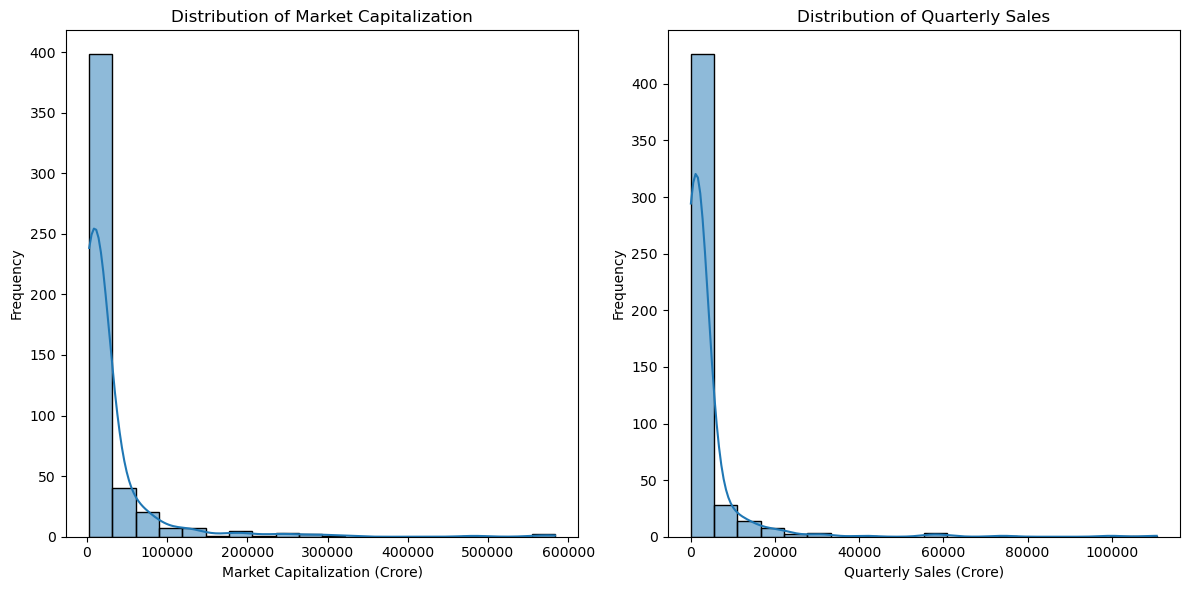


Correlation Coefficient between Market Cap and Quarterly Sales: 0.62


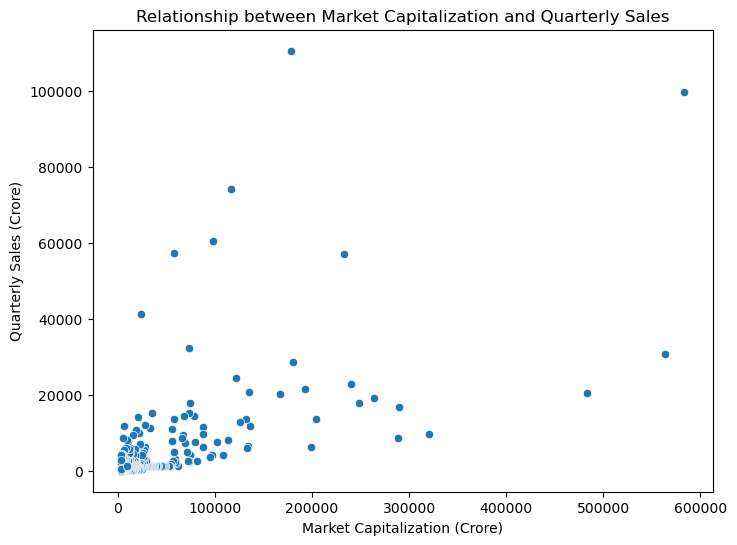

In [9]:
# Distribution plots with numerical outputs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Mar Cap - Crore'], bins=20, kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Frequency')

print("\nSummary Statistics - Market Capitalization:")
print(df['Mar Cap - Crore'].describe())

plt.subplot(1, 2, 2)
sns.histplot(df['Sales Qtr - Crore'], bins=20, kde=True)
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Frequency')

print("\nSummary Statistics - Quarterly Sales:")
print(df['Sales Qtr - Crore'].describe())

plt.tight_layout()
plt.show()

# Scatter plot to visualize relationship between Mar Cap and Sales Qtr with correlation coefficient
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=df)
plt.title('Relationship between Market Capitalization and Quarterly Sales')
plt.xlabel('Market Capitalization (Crore)')
plt.ylabel('Quarterly Sales (Crore)')

correlation_coeff = df['Mar Cap - Crore'].corr(df['Sales Qtr - Crore'])
print(f"\nCorrelation Coefficient between Market Cap and Quarterly Sales: {correlation_coeff:.2f}")

plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on 'Mar Cap - Crore' and 'Sales Qtr - Crore'
df_scaled = df.copy()  # Create a copy of the dataframe

# Scale 'Mar Cap - Crore' and 'Sales Qtr - Crore'
df_scaled[['Mar Cap - Crore', 'Sales Qtr - Crore']] = scaler.fit_transform(df_scaled[['Mar Cap - Crore', 'Sales Qtr - Crore']])

# Display the scaled data
df_scaled.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,1.000000,0.901854
1,2,TCS,0.966013,0.278945
2,3,HDFC Bank,0.826878,0.185627
3,4,ITC,0.547825,0.087912
4,5,H D F C,0.493574,0.151811


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on 'Mar Cap - Crore' and 'Sales Qtr - Crore'
df_scaled = df.copy()  # Create a copy of the dataframe

# Scale 'Mar Cap - Crore' and 'Sales Qtr - Crore'
df_scaled[['Mar Cap - Crore', 'Sales Qtr - Crore']] = scaler.fit_transform(df_scaled[['Mar Cap - Crore', 'Sales Qtr - Crore']])

# Display the scaled data
df_scaled.head()


,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,1.000000,0.901854
1,2,TCS,0.966013,0.278945
2,3,HDFC Bank,0.826878,0.185627
3,4,ITC,0.547825,0.087912
4,5,H D F C,0.493574,0.151811


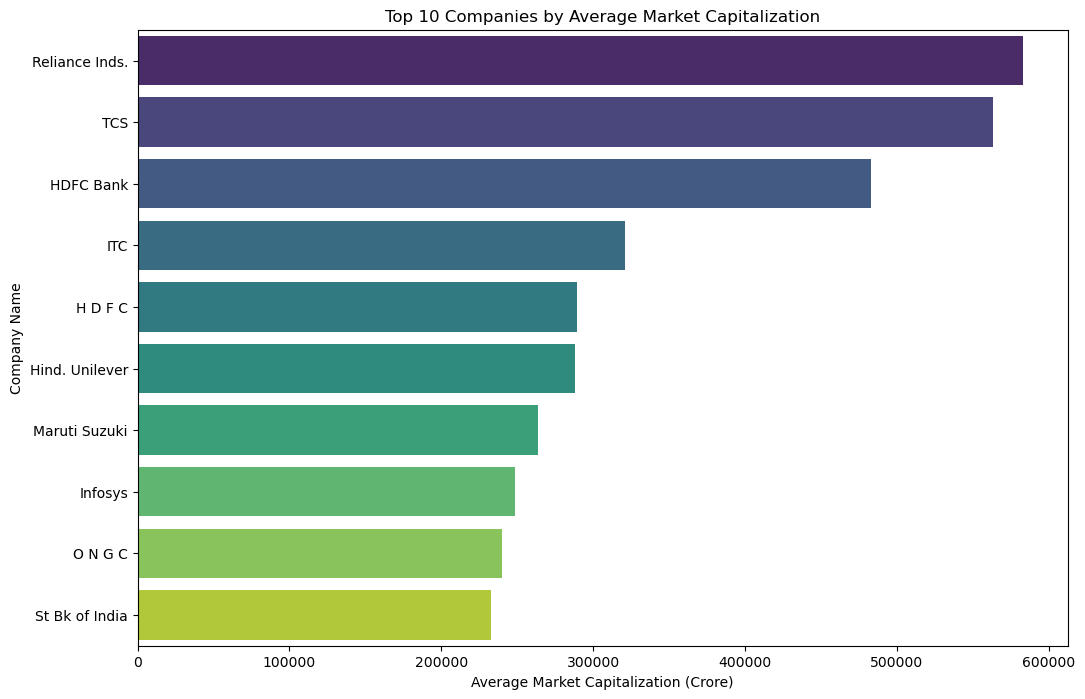

In [15]:
# Calculate average market capitalization for each company
average_market_cap = df.groupby('Name')['Mar Cap - Crore'].mean().sort_values(ascending=False)

# Select top 10 companies by average market capitalization
top_10_companies = average_market_cap.head(10)

# Plotting the top 10 companies by average market capitalization
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_companies.values, y=top_10_companies.index, palette='viridis')
plt.title('Top 10 Companies by Average Market Capitalization')
plt.xlabel('Average Market Capitalization (Crore)')
plt.ylabel('Company Name')
plt.show()

In [17]:
# Define the file path for exporting the cleaned data
output_file = "E:/Data Science Project/Unified Mentor Project/Intership Project/Project 4_Finanical Analytics/cleaned_financial_data.csv"

# Export the cleaned DataFrame to CSV
df.to_csv(output_file, index=False)

print(f"Cleaned and normalized data has been exported to: {output_file}")

Cleaned and normalized data has been exported to: E:/Data Science Project/Unified Mentor Project/Intership Project/Project 4_Finanical Analytics/cleaned_financial_data.csv
